# Observations and Insights:

1. The number of male to female mice on which the trails were conducted is approximately equal. Hence there was no gender bias.

2. The tumor volume data for each mouse for the four most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin, have just one outlier data point. Hence, the data is not variable and the data collection process appears to be fairly consistent.

3. There is a strong positive correlation between mouse weight and average tumor volume for Capomulin regimen.  



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Read the mouse data and the study results
mouse_metadata = pd.read_csv('Resources/Mouse_metadata.csv')
study_results = pd.read_csv('Resources/Study_results.csv')

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on= 'Mouse ID', how= 'outer')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_number = len(combined_data['Mouse ID'].unique())
print(f'Number of mice = {mice_number}')

Number of mice = 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint and view it.
duplicateDF = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicateDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_dataDF = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = 'first')
cleaned_dataDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
cleanedDF_mice = len(cleaned_dataDF['Mouse ID'].unique())
print(f'Number of mice = {cleanedDF_mice}')

Number of mice = 249


#  Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each 
# regimen
stats_tumorbyregimen= cleaned_dataDF.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].sum()
stats_tumorbyregimen['Mean']= cleaned_dataDF.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].mean()
stats_tumorbyregimen['Median'] = cleaned_dataDF.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].median()
stats_tumorbyregimen['Variance'] = cleaned_dataDF.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].var()
stats_tumorbyregimen['Standard Deviation'] = cleaned_dataDF.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].std()
stats_tumorbyregimen['SEM'] = cleaned_dataDF.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].sem()
stats_tumorbyregimen= stats_tumorbyregimen.rename(columns={"Tumor Volume (mm3)": "Total Tumor Volume (mm3)"})
stats_tumorbyregimen

,Total Tumor Volume (mm3),Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,9355.420462,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,9361.228582,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,9413.493529,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,10384.299876,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,10105.671026,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,9780.078122,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,8173.380288,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,9169.417875,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,9816.199991,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

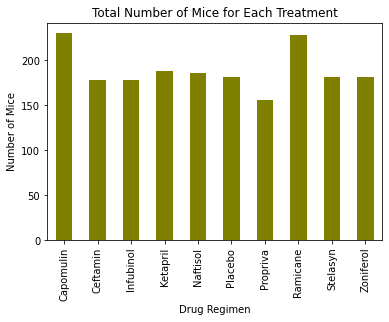

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mice_countDF = cleaned_dataDF.groupby(["Drug Regimen"])[["Mouse ID"]].count()
mice_countDF.plot(kind="bar", color='olive',legend = False, width=0.5)
plt.title('Total Number of Mice for Each Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

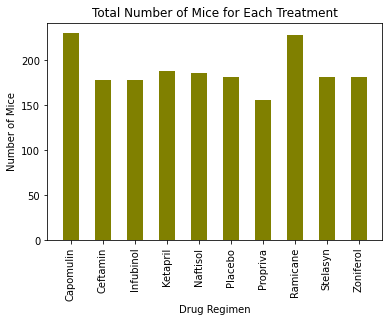

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(mice_countDF.index ,mice_countDF['Mouse ID'], color= 'olive',width=0.5, align="center")
plt.xticks(rotation=90)
plt.title('Total Number of Mice for Each Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()


In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = cleaned_dataDF['Sex'].value_counts()
gender_count

Male      958
Female    930
Name: Sex, dtype: int64

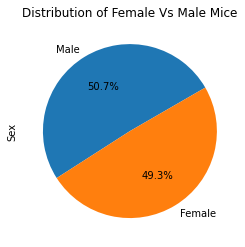

In [10]:
gender_count.plot.pie(startangle=30,autopct='%1.1f%%')
plt.title('Distribution of Female Vs Male Mice')
plt.show()

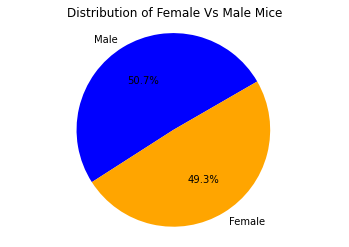

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count = [958,930]
gender = ['Male','Female']
plt.pie(count, labels=gender, colors=['blue','orange'],autopct="%1.1f%%", startangle=30)
plt.axis("equal")
plt.title('Distribution of Female Vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
cleaned_dataDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_ID = cleaned_dataDF.groupby(['Mouse ID']).max()
mouse_ID = mouse_ID[['Timepoint']]
mouse_ID

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [14]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint = pd.merge(mouse_ID, cleaned_dataDF, on= ['Mouse ID','Timepoint'], how= 'inner')
last_timepointDF = last_timepoint[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
last_timepointDF

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686
...,...,...,...,...
244,z435,Propriva,10,48.710661
245,z578,Ramicane,45,30.638696
246,z581,Infubinol,45,62.754451
247,z795,Naftisol,45,65.741070


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the quartiles, IQR and quantitatively determine if there are any potential outliers for the 4 drug regimens. 
for treatment in treatments:
    treatmentDF = last_timepointDF.loc[last_timepointDF['Drug Regimen'] == treatment,:]
    tumor_vol.append(treatmentDF ['Tumor Volume (mm3)'])
    quartiles = treatmentDF['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of tumor volumes with {treatment} is: {lowerq}")
    print(f"The upper quartile of tumor volumes with {treatment} is: {upperq}")
    print(f"The interquartile range of tumor volumes with {treatment} is: {iqr}")
    print(f"The the median of tumor volumes with {treatment}is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    outlier_treatment = treatmentDF.loc[(treatmentDF['Tumor Volume (mm3)'] < lower_bound) | 
                                       (treatmentDF['Tumor Volume (mm3)']  > upper_bound)]
    print(f"Outliers for tumor volumes for {treatment} are: {outlier_treatment}")


The lower quartile of tumor volumes with Capomulin is: 32.37735684
The upper quartile of tumor volumes with Capomulin is: 40.1592203
The interquartile range of tumor volumes with Capomulin is: 7.781863460000004
The the median of tumor volumes with Capomulinis: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Outliers for tumor volumes for Capomulin are: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Tumor Volume (mm3)]
Index: []
The lower quartile of tumor volumes with Ramicane is: 31.56046955
The upper quartile of tumor volumes with Ramicane is: 40.65900627
The interquartile range of tumor volumes with Ramicane is: 9.098536719999998
The the median of tumor volumes with Ramicaneis: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Outliers for tumor volumes for Ramicane are: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Tumor Volume (mm

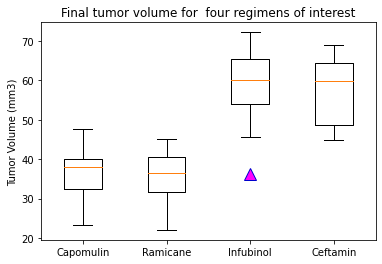

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier_style = dict(markerfacecolor='magenta',markeredgecolor='mediumblue', marker='^',markersize=12)
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume for  four regimens of interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol,flierprops=outlier_style)
x_axis = np.arange(len(tumor_vol)) 
plt.xticks(x_axis+1, treatments, rotation='horizontal')
plt.show()

## Line and Scatter Plots

In [17]:
cleaned_dataDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


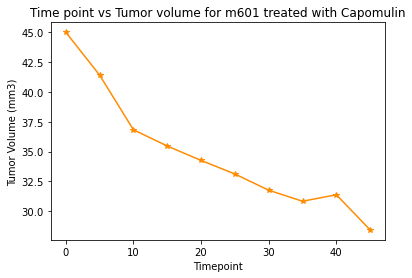

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = cleaned_dataDF.loc[cleaned_dataDF['Drug Regimen']=='Capomulin',:]
Amouse_Capomulin_df = Capomulin_df.loc[Capomulin_df['Mouse ID']=='m601',['Timepoint','Tumor Volume (mm3)']]
plt.plot(Amouse_Capomulin_df['Timepoint'], Amouse_Capomulin_df['Tumor Volume (mm3)'], marker ='*', color='darkorange')
plt.title('Time point vs Tumor volume for m601 treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()                                     


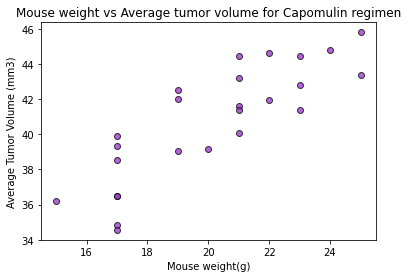

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_Capomulin_df = Capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(scatter_Capomulin_df['Weight (g)'],scatter_Capomulin_df['Tumor Volume (mm3)'], marker="o", 
            facecolors="darkorchid", edgecolors="black", alpha=0.75)
plt.title('Mouse weight vs Average tumor volume for Capomulin regimen')
plt.xlabel('Mouse weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume for Capomulin regimen is:0.84


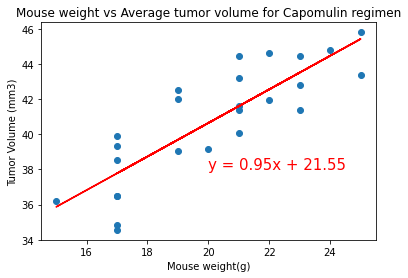

In [20]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the 
#Capomulin regimen
x_values = scatter_Capomulin_df['Weight (g)']
y_values = scatter_Capomulin_df['Tumor Volume (mm3)']

# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_values,y_values)
print(f'The correlation between mouse weight and average tumor volume for Capomulin regimen is:{round(correlation[0],2)}')
      
# Get the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse weight vs Average tumor volume for Capomulin regimen')
plt.xlabel('Mouse weight(g)')
plt.ylabel('Tumor Volume (mm3)')
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.show()
